In [1]:
import mmml
import ase
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csvs_path = "/pchem-data/meuwly/boittier/home/cutoffs_arrays"
csv_files = list(Path(csvs_path).glob("*csv"))
csv_files

[PosixPath('/pchem-data/meuwly/boittier/home/cutoffs_arrays/results5.5.0.01.4.0_trajectory_210.0K_100000steps.xyz.csv'),
 PosixPath('/pchem-data/meuwly/boittier/home/cutoffs_arrays/results5.0.0.01.2.0_trajectory_210.0K_100000steps.xyz.csv'),
 PosixPath('/pchem-data/meuwly/boittier/home/cutoffs_arrays/results5.0.0.01.3.0_trajectory_210.0K_100000steps.xyz.csv'),
 PosixPath('/pchem-data/meuwly/boittier/home/cutoffs_arrays/results5.0.0.01.4.0_trajectory_210.0K_100000steps.xyz.csv'),
 PosixPath('/pchem-data/meuwly/boittier/home/cutoffs_arrays/results5.0.0.1.2.0_trajectory_210.0K_100000steps.xyz.csv'),
 PosixPath('/pchem-data/meuwly/boittier/home/cutoffs_arrays/results5.0.0.1.3.0_trajectory_210.0K_100000steps.xyz.csv'),
 PosixPath('/pchem-data/meuwly/boittier/home/cutoffs_arrays/results5.0.0.1.4.0_trajectory_210.0K_100000steps.xyz.csv'),
 PosixPath('/pchem-data/meuwly/boittier/home/cutoffs_arrays/results5.5.0.01.2.0_trajectory_210.0K_100000steps.xyz.csv'),
 PosixPath('/pchem-data/meuwly/boit

In [3]:
dfs = [pd.read_csv(_).iloc[1:10000] for _ in csv_files]

In [4]:
idx = 1
dfs[idx].describe()

,step,time(fs),totalEnergy(eV),potEnergy(eV),maxForces(eV/Å),kinEnergy(eV),Temperature(K)
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.000000,5000.000000,-823.527027,-826.244786,2.629838,2.717759,105.127642
std,2886.607005,2886.607005,0.003783,0.122034,0.454415,0.121779,4.710627
min,1.000000,1.000000,-823.534803,-828.439270,0.372840,2.183737,84.470737
25%,2500.500000,2500.500000,-823.530188,-826.307404,2.317942,2.649845,102.500608
50%,5000.000000,5000.000000,-823.527595,-826.239563,2.556052,2.713379,104.958212
75%,7499.500000,7499.500000,-823.523855,-826.176514,2.847565,2.780125,107.540061
max,9999.000000,9999.000000,-823.518794,-825.714417,5.105740,4.906144,189.778177


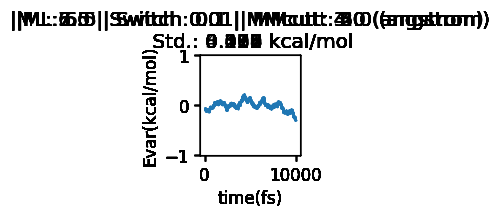

In [5]:
results = {}
results_std = {}
import patchworklib as pw
counter = 0
for i in range(len(dfs)):
    dfs[i]["Evar(kcal/mol)"] = (dfs[i]["totalEnergy(eV)"] - dfs[i]["totalEnergy(eV)"].mean()) * 23.0609	
    _ = dfs[i]["Evar(kcal/mol)"].std()
    
    if _ < 10:
        counter += 1
        ax = pw.Brick()
        dfs[i].plot.scatter("time(fs)", "Evar(kcal/mol)", s=0.1, ax=ax)
        t = csv_files[i]
        t = str(t).split("results")[-1].split("_")[0].split(".")
        ML = float(f"{t[0]}.{t[1]}")
        SW = float(f"{t[2]}.{t[3]}")
        MM = float(f"{t[4]}.{t[5]}")

        
        
        t = f"|ML: {t[0]}.{t[1]} | Switch: {t[2]}.{t[3]} | MMcutt: {t[4]}.{t[5]} (angstrom)"
        t += f"\n Std.: {_:.3f} kcal/mol"
        ax.set_title(t)
        results_std[(ML, SW, MM)] = _
        _ = 1.0
        ax.set_ylim(-_, _)


        results[(ML, SW, MM)] = ax



In [6]:
counter

22

In [7]:
keys = list(results.keys())
keys

[(5.0, 0.01, 2.0),
 (5.0, 0.01, 3.0),
 (5.0, 0.01, 4.0),
 (5.0, 0.1, 3.0),
 (5.0, 0.1, 4.0),
 (5.5, 0.01, 3.0),
 (5.5, 0.1, 4.0),
 (6.0, 0.01, 3.0),
 (6.0, 0.01, 4.0),
 (6.0, 0.1, 3.0),
 (6.0, 0.1, 4.0),
 (6.5, 0.01, 2.0),
 (6.5, 0.01, 4.0),
 (6.5, 0.01, 5.0),
 (6.5, 0.1, 3.0),
 (6.5, 0.1, 4.0),
 (7.0, 0.01, 4.0),
 (7.0, 0.01, 6.0),
 (7.5, 0.01, 2.0),
 (7.5, 0.01, 4.0),
 (7.5, 0.01, 5.0),
 (7.5, 0.01, 6.0)]

In [88]:
keys.sort(key=lambda x: results_std[x])
keys

[(5.0, 0.1, 4.0),
 (5.0, 0.01, 2.0),
 (7.5, 0.01, 6.0),
 (6.5, 0.1, 4.0),
 (5.5, 0.1, 4.0),
 (6.5, 0.1, 3.0),
 (7.0, 0.01, 6.0),
 (5.0, 0.01, 4.0),
 (5.0, 0.1, 3.0),
 (5.5, 0.01, 3.0),
 (5.0, 0.01, 3.0),
 (7.5, 0.01, 5.0),
 (7.0, 0.01, 4.0),
 (7.5, 0.01, 2.0),
 (6.5, 0.01, 5.0),
 (6.0, 0.01, 4.0),
 (6.5, 0.01, 4.0),
 (6.0, 0.01, 3.0),
 (6.5, 0.01, 2.0),
 (6.0, 0.1, 3.0),
 (7.5, 0.01, 4.0),
 (6.0, 0.1, 4.0)]

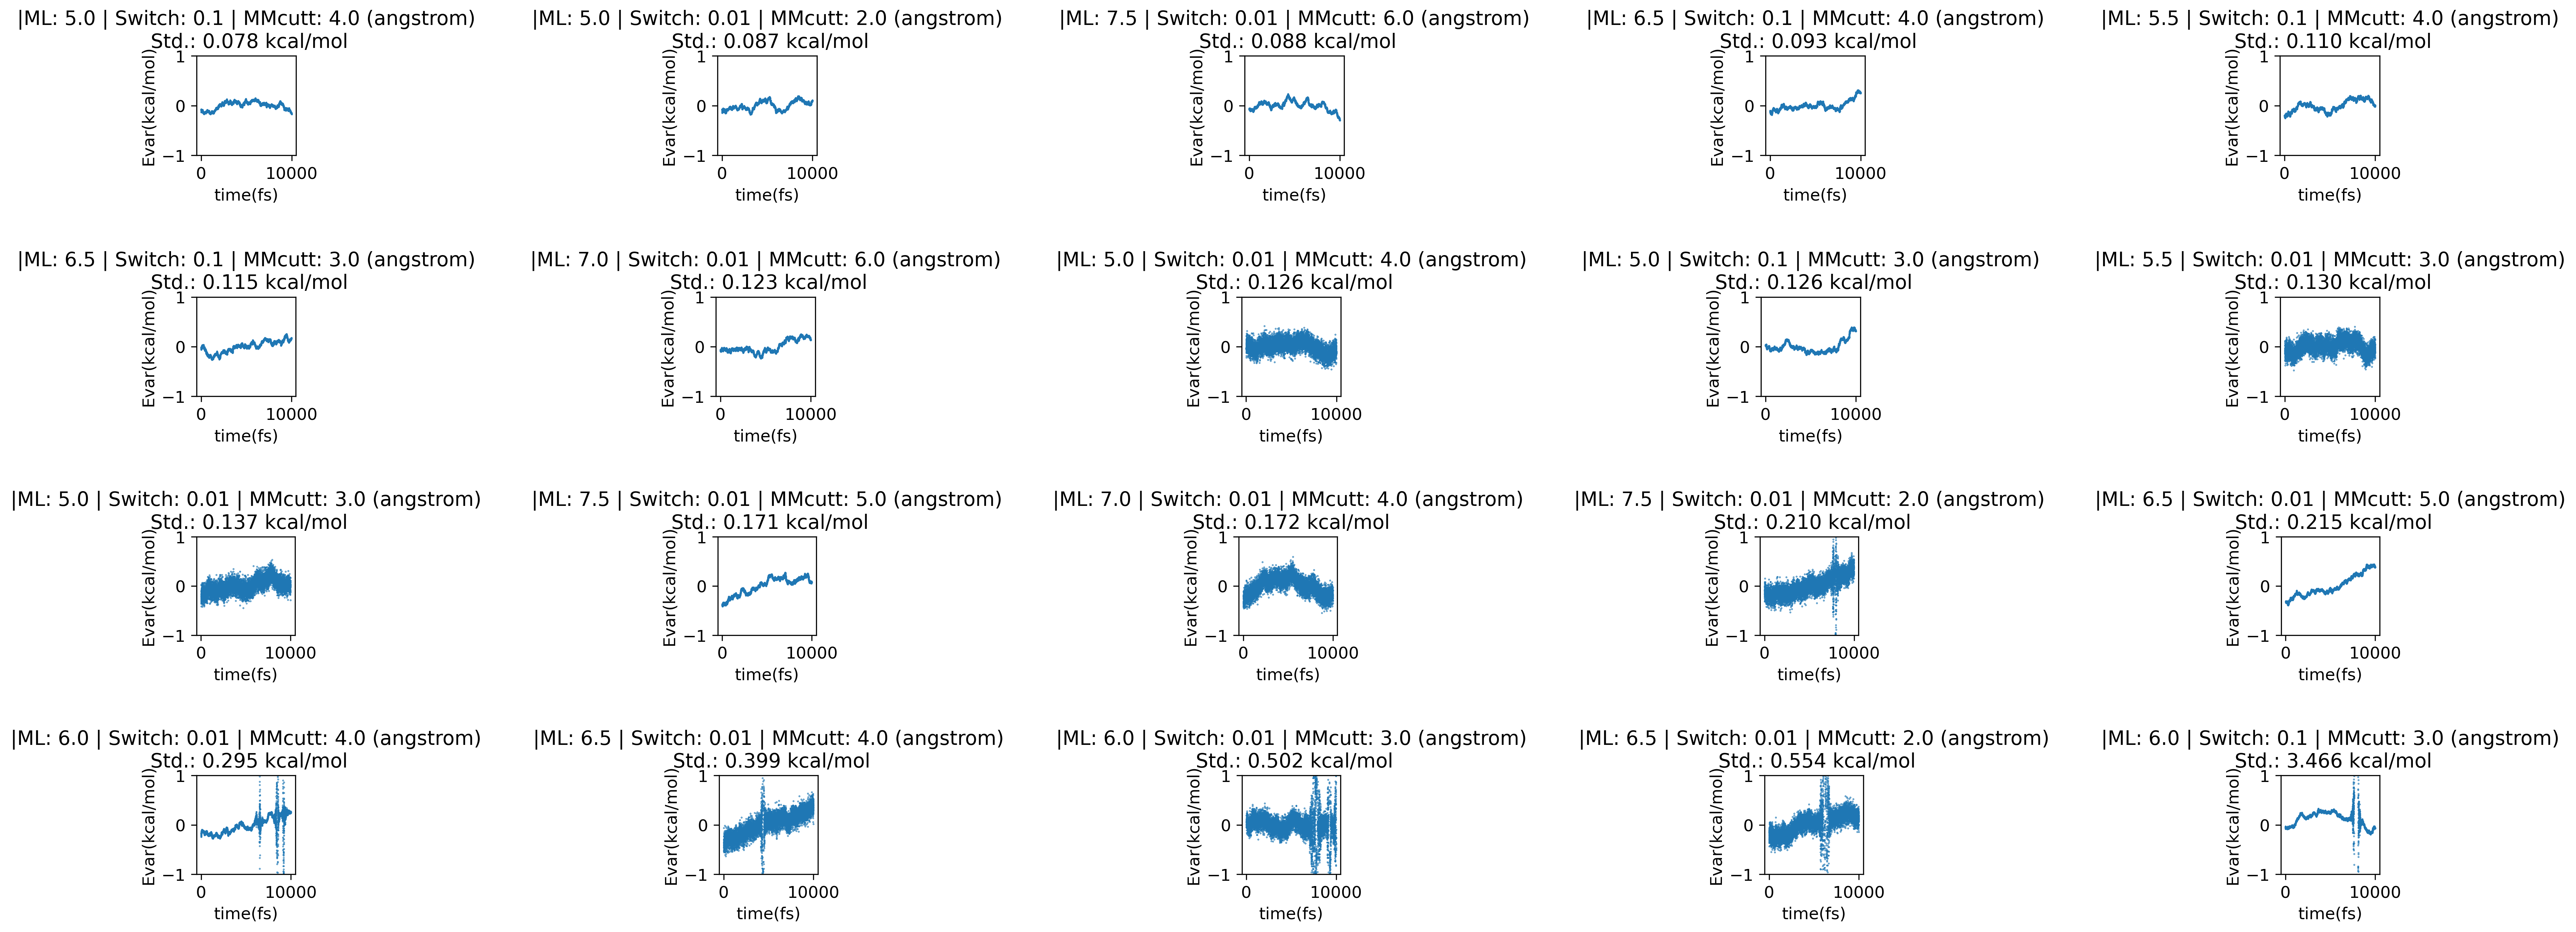

In [89]:
n = 5
pw.stack([results[k] for k in keys[:n]]) / pw.stack([results[k] for k in keys[n:2*n]]) / pw.stack([results[k] for k in keys[2*n:3*n]]) / pw.stack([results[k] for k in keys[3*n:4*n]])

In [44]:
dfs[idx].iloc[:10000]

,step,time(fs),totalEnergy(eV),potEnergy(eV),maxForces(eV/Å),kinEnergy(eV),Temperature(K),Evar(kcal/mol)
1,1,1.0,-823.533126,-828.439270,0.372840,4.906144,189.778177,-0.140663
2,2,2.0,-823.532748,-828.415283,0.631868,4.882536,188.864975,-0.131929
3,3,3.0,-823.532902,-828.377625,0.789130,4.844723,187.402314,-0.135481
4,4,4.0,-823.533538,-828.327515,1.109813,4.793976,185.439349,-0.150164
5,5,5.0,-823.532555,-828.263794,1.489364,4.731239,183.012554,-0.127489
...,...,...,...,...,...,...,...,...
9995,9995,9995.0,-823.522900,-826.329651,2.959323,2.806751,108.570008,0.095164
9996,9996,9996.0,-823.523129,-826.324463,2.978712,2.801334,108.360482,0.089891
9997,9997,9997.0,-823.523257,-826.318359,3.203702,2.795102,108.119418,0.086928
9998,9998,9998.0,-823.523052,-826.311035,3.202248,2.787983,107.844052,0.091666
